### Copyright (C) 2020 Sobhan Moradiyan Daghigh - All Rights Reserved

## Data Mining UniProj - no.3
#### 1/8/2021

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize, LabelEncoder

### Reading dataset

In [29]:
quality = pd.read_excel('dataset/keifiat.xlsx')

## Part 1: 
## Clustering the products based on popularity

### Filter the columns which need them

In [3]:
quality = quality.filter(['product_id', 'product_title', 'recommend'])
quality.head()

,product_id,product_title,recommend
0,3692,ماوس بی‌سیم لاجیتک مدل M325,\N
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,recommended
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,not_recommended
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,no_idea
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,no_idea


In [4]:
quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_id     100000 non-null  int64 
 1   product_title  100000 non-null  object
 2   recommend      100000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


### Do grouping by on "product_id" in order to fill in missing datas in "recommend" column

In [5]:
groups = quality.groupby(by=['product_id'])
groups.first()

,product_title,recommend
product_id,,
300,پرینتر لیزری اچ پی مدل LaserJet P2035,\N
310,اچ پی لیزر جت پی 2055 دی,\N
352,گوشی موبایل نوکیا 5800 نویگیشن ادیشن,\N
363,گوشی موبایل نوکیا 6303 کلاسیک,\N
423,لپ تاپ ایسر اسپایر 5738 زد جی,\N
...,...,...
907669,چراغ دیواری مجیک لایت مدل WGBT,\N
908646,کتابخانه اوشن تجارت طرح S شکل کد 160cm,\N
908760,اسپری مردانه فیکورس مدل AVENTOUS,\N


### Theres about 36000 missing recommends

In [6]:
quality['recommend'].value_counts()

recommended        36972
\N                 36382
not_recommended    16110
no_idea            10536
Name: recommend, dtype: int64

### Try to inplace the missing recommends with the most frequent recommends in each group

In [7]:
for grp, pdf in groups:
    List = quality.loc[(quality['product_id'] == grp) & (quality['recommend'] != '\\N')]['recommend'].tolist()
    if List:
        most_frequent = max(set(List), key = List.count)
        quality.loc[(quality['product_id'] == grp) & (quality['recommend'] == '\\N'), ['recommend']] = most_frequent

### Here we go .. we filled in about 18000 of missing recommends


In [8]:
quality['recommend'].value_counts()

recommended        49753
not_recommended    19355
\N                 18717
no_idea            12175
Name: recommend, dtype: int64

### Now try to drop that missing recommends which are still exist 

In [9]:
quality = quality[quality['recommend'] != '\\N']
quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81283 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     81283 non-null  int64 
 1   product_title  81283 non-null  object
 2   recommend      81283 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


In [10]:
quality['recommend'].value_counts()

recommended        49753
not_recommended    19355
no_idea            12175
Name: recommend, dtype: int64

### Save the preprocessed dataset till here

In [11]:
quality.to_csv('preprocessed_quality.csv', index=False, encoding='utf-8-sig')

### Read it again to continue :)

In [12]:
quality = pd.read_csv('preprocessed_quality.csv')
quality.head()

,product_id,product_title,recommend
0,3692,ماوس بی‌سیم لاجیتک مدل M325,recommended
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,recommended
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,not_recommended
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,no_idea
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,no_idea


### Here we convert the "recommend" column to this format for doing cluster

In [13]:
dummy = pd.get_dummies(quality['recommend'])
dummy.head()

,no_idea,not_recommended,recommended
0,0,0,1
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0


### Then add each new column to the main dataset

In [14]:
quality['no_idea'] = dummy.iloc[:, 0]
quality['not_recommended'] = dummy.iloc[:, 1]
quality['recommended'] = dummy.iloc[:, 2]
quality.head()

,product_id,product_title,recommend,no_idea,not_recommended,recommended
0,3692,ماوس بی‌سیم لاجیتک مدل M325,recommended,0,0,1
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,recommended,0,0,1
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,not_recommended,0,1,0
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,no_idea,1,0,0
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,no_idea,1,0,0


### And here we do grouping by on "product_id" and then add the whole recommends of each product 

In [15]:
rec_sum = quality.groupby(by=['product_id'], as_index=False).sum()
rec_sum.head()

,product_id,no_idea,not_recommended,recommended
0,1336,1,0,2
1,1482,0,0,5
2,1540,0,1,0
3,2535,0,0,1
4,2739,0,0,2


In [16]:
quality = quality.filter(['product_id', 'product_title'])
quality = quality.drop_duplicates(subset='product_id', keep='first')
quality.head()

,product_id,product_title
0,3692,ماوس بی‌سیم لاجیتک مدل M325
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...


### Finaly merge the dataframes to have a nice dataset, ready for clustering

In [17]:
quality = pd.merge(quality, rec_sum, on='product_id')
quality.head()

,product_id,product_title,no_idea,not_recommended,recommended
0,3692,ماوس بی‌سیم لاجیتک مدل M325,0,0,2
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,0,1,5
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,0,1,0
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,1,0,3
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,1,2,11


### Normalize the values to have a better and correct relations

In [18]:
X = normalize(quality.iloc[:, 2:])
X

array([[0.        , 0.        , 1.        ],
       [0.        , 0.19611614, 0.98058068],
       [0.        , 1.        , 0.        ],
       ...,
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ]])

## K-means

### First, we must decide on the number of clusters, I mean the value of k

### To do this, I wanna make a visualization on a range of different k s

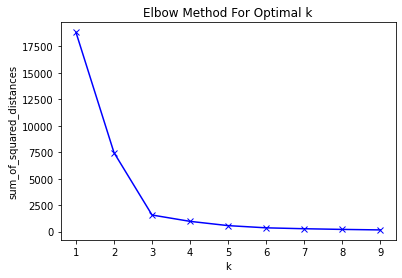

In [19]:
sum_of_squared_distances = []
K = range(1,10)

for k in K:
    km = KMeans(n_clusters=k, max_iter=100, n_init=50)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### According to the above plot, theres a dent on k=3

In [20]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=50)
model.fit(X)
labels=model.labels_

quality['cluster'] = labels
quality.head()

,product_id,product_title,no_idea,not_recommended,recommended,cluster
0,3692,ماوس بی‌سیم لاجیتک مدل M325,0,0,2,2
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,0,1,5,2
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,0,1,0,0
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,1,0,3,2
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,1,2,11,2


### K-means clusterd the dataset in 3 part
### Now try to decide what does each cluster contain

In [21]:
groups = quality.groupby(by=['cluster'])
groups.first()

,product_id,product_title,no_idea,not_recommended,recommended
cluster,,,,,
0,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,0,1,0
1,161548,فلاسک هنری مدل Virginia Special ظرفیت 1.9 لیتر,1,0,0
2,3692,ماوس بی‌سیم لاجیتک مدل M325,0,0,2


### As u see in the above table, 
### Cluster 2 contains the products which are very popular and mostly recommended
### Cluster 1 contains the products which are not very popular and mostly are not_recommended
### Cluster 0 contains the products which are in the middle, not popular not unpopular

In [22]:
for grp, pdf in groups:
    print("\n\ncluster: ", grp, "    product counts: ", len(pdf))
    print(pd.DataFrame(pdf['product_title'].tolist()).iloc[:5,])



cluster:  0     product counts:  9186
                                                   0
0              یدک پولیشر میکروفایبر مهسان مدل 20119
1  ادو پرفیوم زنانه امپر مدل Chifon حجم 100 میلی ...
2        گوشی موبایل ال جی مدل V10 ظرفیت 32 گیگابایت
3                          هدفون شیائومی مدل Quantie
4                           هدست واقعیت مجازی کوییلو


cluster:  1     product counts:  6228
                                                0
0  فلاسک هنری مدل Virginia Special ظرفیت 1.9 لیتر
1                          هدفون کریتیو مدل MA200
2                 جعبه نظم دهنده صندوق خودرو تاشو
3                    کیس کامپیوتر گرین مدل Oraman
4                    میکروسکوپ سولومارک مدل HM900


cluster:  2     product counts:  20047
                                                   0
0                        ماوس بی‌سیم لاجیتک مدل M325
1  شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...
2   گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت
3  شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ

## Extra Part
### Continue of part 1

### As u know, the Hierarchical Agglomerative Clustering is not suitble for huge datas
### So just for an example, see the agglomerative clustring on 30 rows of dataset

In [23]:
quality.iloc[10:20,]

,product_id,product_title,no_idea,not_recommended,recommended,cluster
10,156041,شمع خودرو ان جی کی مدل BKR6EGP,2,1,9,2
11,134367,ماشین بازی بیبی لند مدل Top Car,0,0,1,2
12,114006,شارژر همراه لنوو با ظرفیت 10400 میلی آمپر ساعت,0,0,1,2
13,146879,فلاسک غذا خودرو بلک اند دکر مدل BDV212F,0,0,1,2
14,90894,مچ‌ بند هوشمند آی واون مدل i5 Plus,2,5,18,2
15,21340,ماشین اصلاح صورت پاناسونیک سری Lamdash مدل ES-...,1,1,29,2
16,144139,هدفون کریتیو مدل MA200,1,1,0,1
17,105719,ادو تویلت مردانه دیور مدل Sauvage حجم 100 میلی...,0,0,4,2
18,147165,روغن موتور خودرو توتال مدل Quartz 7000 حجم 4 لیتر,1,1,16,2
19,116387,اسپیکر هترون مدل HSP260,0,0,1,2


In [24]:
data_segmented = normalize(quality.iloc[:30, 2:])
data_segmented

array([[0.        , 0.        , 0.70710678, 0.70710678],
       [0.        , 0.18257419, 0.91287093, 0.36514837],
       [0.        , 1.        , 0.        , 0.        ],
       [0.26726124, 0.        , 0.80178373, 0.53452248],
       [0.0877058 , 0.1754116 , 0.96476382, 0.1754116 ],
       [0.        , 0.        , 0.4472136 , 0.89442719],
       [0.21821789, 0.        , 0.87287156, 0.43643578],
       [0.        , 0.9701425 , 0.24253563, 0.        ],
       [0.70710678, 0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.70710678, 0.70710678],
       [0.21081851, 0.10540926, 0.9486833 , 0.21081851],
       [0.        , 0.        , 0.4472136 , 0.89442719],
       [0.        , 0.        , 0.4472136 , 0.89442719],
       [0.        , 0.        , 0.4472136 , 0.89442719],
       [0.10585122, 0.26462806, 0.95266102, 0.10585122],
       [0.03436041, 0.03436041, 0.99645179, 0.06872081],
       [0.57735027, 0.57735027, 0.        , 0.57735027],
       [0.        , 0.        ,

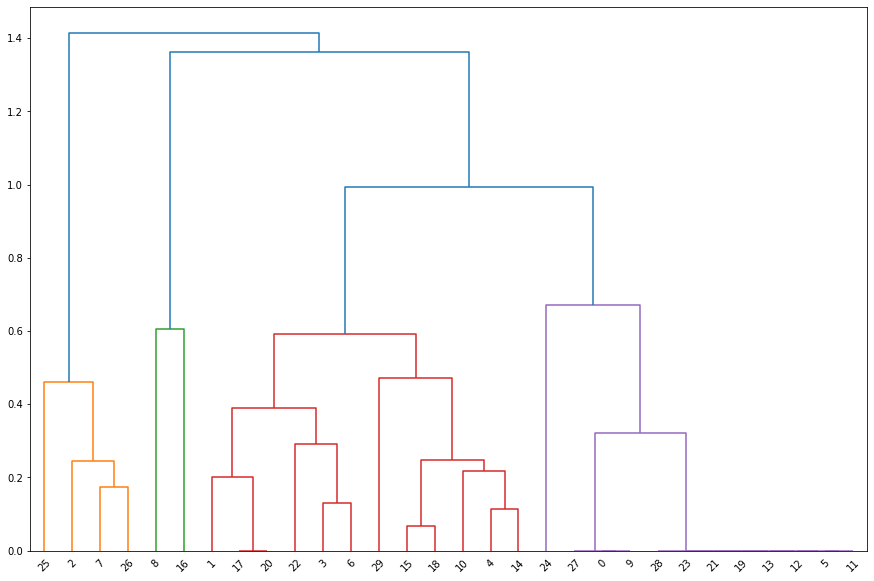

In [25]:
plt.figure(figsize=(15, 10))
dend = shc.dendrogram(shc.linkage(data_segmented, method='complete'))

## Part 2: 
## Clustering the cities based on the amount of purchases

In [308]:
orders = pd.read_csv('dataset/orders.csv')
orders = orders.filter(['city_name_fa', 'Quantity_item'])
orders.head()

,city_name_fa,Quantity_item
0,محمود آباد,1.0
1,خرمدره,1.0
2,قرچک,1.0
3,قم,1.0
4,تهران,1.0


In [309]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   city_name_fa   200000 non-null  object 
 1   Quantity_item  200000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


In [310]:
orders.describe()

,Quantity_item
count,200000.000000
mean,1.261225
std,1.801186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,500.000000


In [311]:
groups = orders.groupby(by=['city_name_fa'], as_index=False)
groups.first()

,city_name_fa,Quantity_item
0,آب بر,1.0
1,آبادان,1.0
2,آباده,1.0
3,آباده طشک,1.0
4,آبدان,1.0
...,...,...
901,گیوی,1.0
902,یاسوج,1.0
903,یاسوکند,1.0
904,یامچی,1.0


In [312]:
orders = groups.sum()
orders.head()

,city_name_fa,Quantity_item
0,آب بر,15.0
1,آبادان,493.0
2,آباده,84.0
3,آباده طشک,3.0
4,آبدان,2.0


In [130]:
dummy = pd.get_dummies(orders['Quantity_item'])
dummy.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,3048.0,3051.0,3512.0,4086.0,4923.0,5559.0,7144.0,7552.0,7698.0,136538.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
X = normalize(dummy)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [132]:
XX = orders.copy()
XX['Quantity_item2'] = 0
XX = XX.iloc[:, 1:]
XX

,Quantity_item,Quantity_item2
0,15.0,0
1,493.0,0
2,84.0,0
3,3.0,0
4,2.0,0
...,...,...
901,18.0,0
902,335.0,0
903,2.0,0
904,1.0,0


In [207]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='complete')
X = np.array(orders['Quantity_item'].tolist())
model.fit(X.reshape(-1,1))
orders['cluster'] = labels
orders.head()

,city_name_fa,Quantity_item,cluster
0,آب بر,15.0,0
1,آبادان,493.0,6
2,آباده,84.0,14
3,آباده طشک,3.0,0
4,آبدان,2.0,0


In [187]:
plt.scatter(X[labels==0, 0], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [227]:
X = orders['Quantity_item']

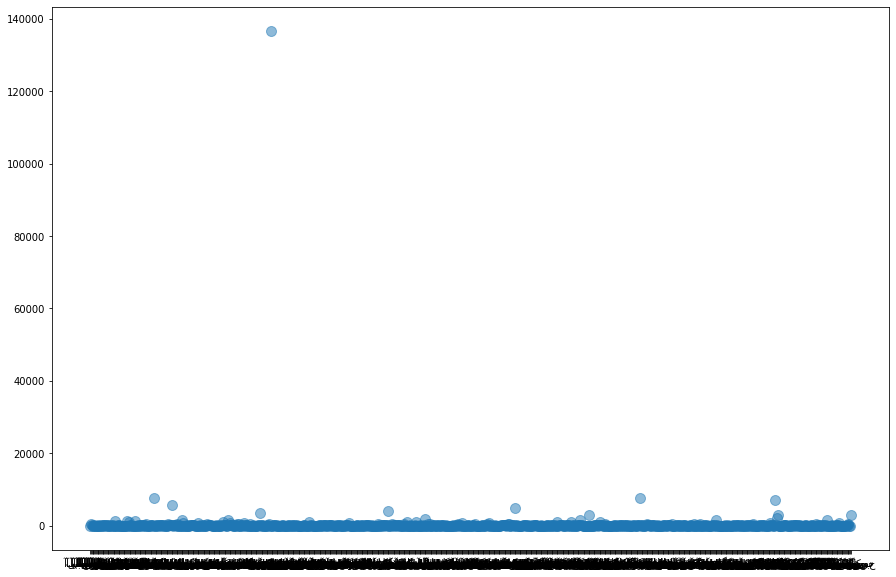

In [236]:
# orders.plot(kind='scatter', x='Quantity_item', y='city_name_fa', s=20)
plt.figure(figsize=(15, 10))
plt.scatter(orders['city_name_fa'], orders['Quantity_item'], s=100, alpha=0.5)

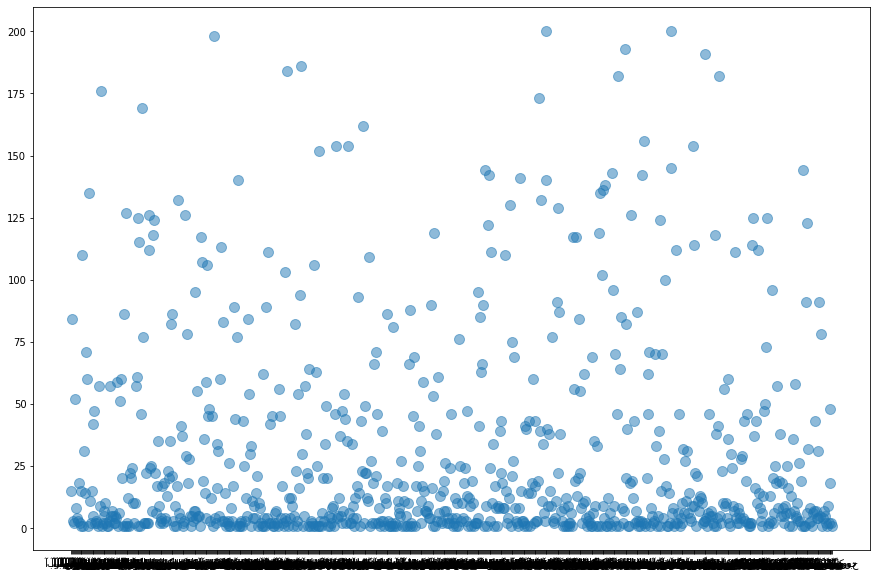

In [242]:
orders = orders[orders['Quantity_item'] <= 2000]
plt.figure(figsize=(15, 10))
plt.scatter(orders['city_name_fa'], orders['Quantity_item'], s=100, alpha=0.5, )

In [221]:
X = orders['Quantity_item'].tolist()
X = [x if (x != 136538) else 0 for x in X]
X = np.array(X)

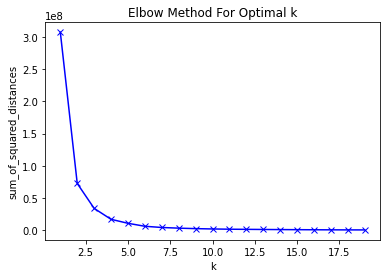

In [222]:
sum_of_squared_distances = []
K = range(1,20)

for k in K:
    km = KMeans(n_clusters=k, max_iter=100, n_init=50)
    km = km.fit(X.reshape(-1,1))
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [223]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=50)
model.fit(X.reshape(-1,1))
labels=model.labels_

orders['cluster'] = labels
orders

,city_name_fa,Quantity_item,cluster
0,آب بر,15.0,0
1,آبادان,493.0,3
2,آباده,84.0,0
3,آباده طشک,3.0,0
4,آبدان,2.0,0
...,...,...,...
901,گیوی,18.0,0
902,یاسوج,335.0,0
903,یاسوکند,2.0,0
904,یامچی,1.0,0


In [224]:
groups = orders.groupby(by=['cluster'])
ceed = groups.mean()
groups.first()

,city_name_fa,Quantity_item
cluster,,
0,آب بر,15.0
1,اصفهان,7552.0
2,تبریز,3512.0
3,آبادان,493.0


In [225]:
ceed

,Quantity_item
cluster,
0,196.383721
1,6988.250000
2,3591.500000
3,940.361111


In [226]:
for grp, pdf in groups:
    print(len(pdf))

860
4
6
36


In [135]:
x = np.random.random(13876)
x

array([0.62214711, 0.69713185, 0.36936006, ..., 0.0307235 , 0.97087814,
       0.04151373])

In [136]:
km = KMeans()
km.fit(x.reshape(-1,1))  # -1 will be calculated to be 13876 here

KMeans()

In [313]:
X = orders['Quantity_item'].tolist()
# X = [x if (x != 136538) else 0 for x in X]
X = np.array(X)

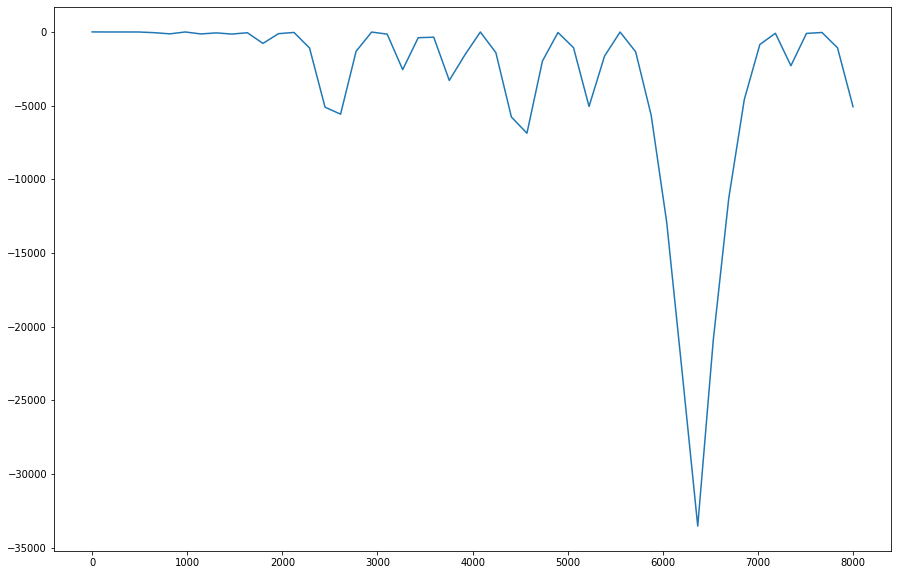

In [352]:
%matplotlib inline

from numpy import linspace
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot
plt.figure(figsize=(15, 10))

a = X.reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(a)
s = linspace(0,8000)
e = kde.score_samples(s.reshape(-1,1))
plot(s, e)

In [353]:
from scipy.signal import argrelextrema
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
print("Minima:", s[mi])
print("Maxima:", s[ma])

Minima: [ 163.26530612  816.32653061 1142.85714286 1469.3877551  1795.91836735
 2612.24489796 3265.30612245 3755.10204082 4571.42857143 5224.48979592
 6367.34693878 7346.93877551]
Maxima: [ 326.53061224  979.59183673 1306.12244898 1632.65306122 2122.44897959
 2938.7755102  3591.83673469 4081.63265306 4897.95918367 5551.02040816
 7183.67346939 7673.46938776]


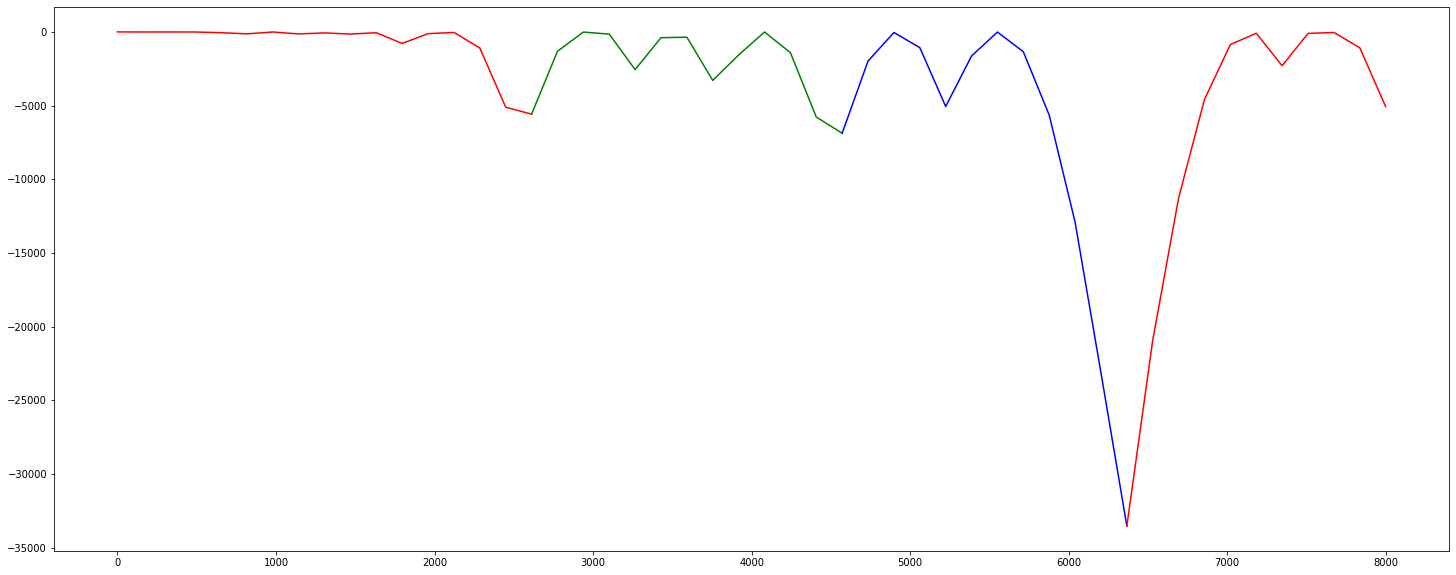

In [359]:
plt.figure(figsize=(25, 10))
plot(s[:mi[5]+1], e[:mi[5]+1], 'r',
#      s[mi[0]:mi[1]+1], e[mi[0]:mi[1]+1], 'g',
#      s[mi[1]:mi[2]+1], e[mi[1]:mi[2]+1], 'b',
#      s[mi[2]:mi[3]+1], e[mi[2]:mi[3]+1], 'r',
#      s[mi[3]:mi[4]+1], e[mi[3]:mi[4]+1], 'g',
#      s[mi[4]:mi[5]+1], e[mi[4]:mi[5]+1], 'g',
     s[mi[5]:mi[8]+1], e[mi[5]:mi[8]+1], 'g',
#      s[mi[6]:mi[7]+1], e[mi[6]:mi[7]+1], 'g',
#      s[mi[7]:mi[8]+1], e[mi[7]:mi[8]+1], 'b',
     s[mi[8]:mi[10]+1], e[mi[8]:mi[10]+1], 'b',
#      s[mi[9]:mi[10]+1], e[mi[9]:mi[10]+1], 'g',
     s[mi[10]:], e[mi[10]:], 'r')
#      s[ma], e[ma], 'go',
#      s[mi], e[mi], 'ro')

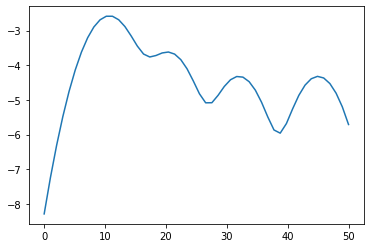

In [350]:
%matplotlib inline

from numpy import array, linspace
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot

a = array([10,11,9,32,21,11,45,20,11,12]).reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(a)
s = linspace(0,50)
e = kde.score_samples(s.reshape(-1,1))
plot(s, e)

### Yoohha :) Finito